# 

## Importing Some Necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os


from sklearn.impute import SimpleImputer


## Setting up the notebook Enviornment

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [3]:
df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
val = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [4]:
df.tail(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


<AxesSubplot:>

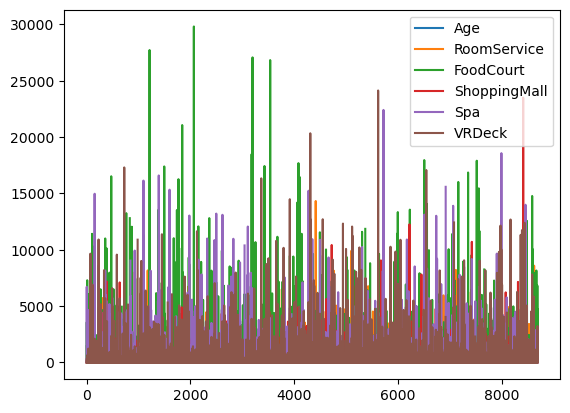

In [5]:
df.plot()

In [6]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<AxesSubplot:>

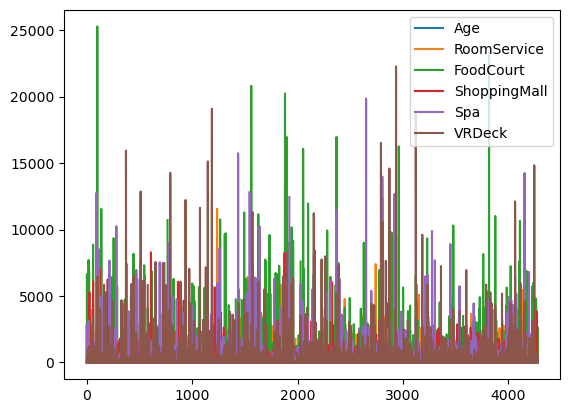

In [10]:
val.plot()

In [11]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [12]:
val.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [13]:
df["Transported"].count()

8693

# Finding The Correlation Matrix

<AxesSubplot:>

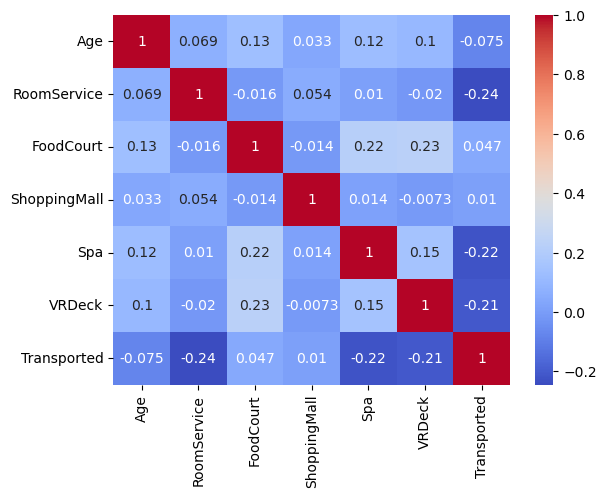

In [14]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm")

In [15]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

## Extracting cabin number side and Deck

In [16]:
df['CabinDeck'] = df['Cabin'].str.split('/', expand=True)[0]
df['CabinNum']  = df['Cabin'].str.split('/', expand=True)[1]
df['CabinSide'] = df['Cabin'].str.split('/', expand=True)[2]

df.drop(columns = ['Cabin'], inplace = True)

In [17]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [18]:
val['CabinDeck'] = val['Cabin'].str.split('/', expand=True)[0]
val['CabinNum']  = val['Cabin'].str.split('/', expand=True)[1]
val['CabinSide'] = val['Cabin'].str.split('/', expand=True)[2]

val.drop(columns = ['Cabin'], inplace = True)

In [19]:
df.drop(columns=["Name","PassengerId"], inplace=True)
val.drop(columns=["Name","PassengerId"], inplace=True)

In [20]:
df.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNum,CabinSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S


In [21]:
val.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNum,CabinSide
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S


## Filling null values in these catagorical columns

In [22]:
cat_columns = ['HomePlanet','CryoSleep','Destination','VIP','CabinDeck', 'CabinNum','CabinSide']
imp = SimpleImputer(strategy="most_frequent")
df[cat_columns] = imp.fit_transform(df[cat_columns])
val[cat_columns] = imp.transform(val[cat_columns])

## Filling null values in these Numerical columns

In [23]:
num_columns = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
imp = SimpleImputer(strategy="median")
df[num_columns] = imp.fit_transform(df[num_columns])
val[num_columns] = imp.transform(val[num_columns])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  CabinDeck     8693 non-null   object 
 12  CabinNum      8693 non-null   object 
 13  CabinSide     8693 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Converting Categorical values to numerical values

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[cat_columns] = df[cat_columns].apply(le.fit_transform)
val[cat_columns] = val[cat_columns].apply(le.fit_transform)

In [26]:
df.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNum,CabinSide
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1


In [27]:
val.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNum,CabinSide
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,6,820,1
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,927,1
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,0,1


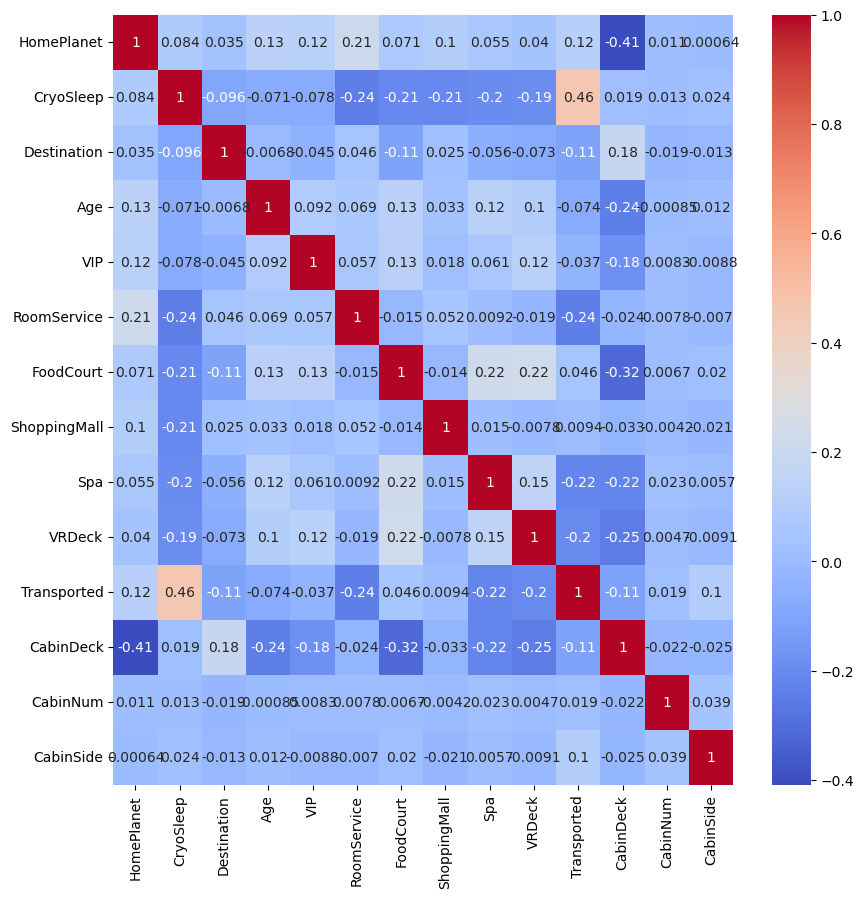

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm", ax = ax)
plt.show()

## Splitting the dataset in X, Y

In [29]:
X = df.drop(columns=['Transported'],axis = 1)
y = df['Transported']

## Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y, random_state = 42, test_size=0.2)

In [31]:
X_train.shape

(6954, 13)

In [32]:
y_train.shape

(6954,)

## Applying Model

In [33]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(learning_rate=0.05, max_depth=8, n_estimators=200, subsample=0.8, colsample_bytree=0.8)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [35]:
# y_pred = svm.predict(X_test)
y_pred = xgb_model.predict(X_test)
# y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

## Evaluation Accuracy, recall, precision

In [36]:
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)

print("Accuracy: ", a)
print("precision: ", p)
print("Recall: ", r)

Accuracy:  0.7998849913743531
precision:  0.7997737556561086
Recall:  0.8052391799544419


## Evaluation Confusion Matrix

In [37]:
c = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

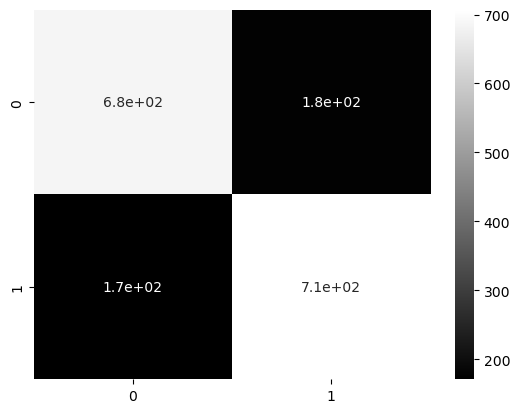

In [38]:
sns.heatmap(c, annot= True, cmap="gray")

In [39]:
ID = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")['PassengerId']

In [40]:
y_pred = xgb_model.predict(val)
y_pred = y_pred.astype(bool)
y_pred

array([ True, False,  True, ...,  True,  True,  True])

In [41]:
output=pd.DataFrame({'PassengerId':ID ,'Transported': y_pred})
output['Transported']=output['Transported']
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [42]:
output.to_csv('submission.csv',index=False)